<a href="https://colab.research.google.com/github/aniket-work/high_dimensional_space_data_project/blob/main/svm_wildfire_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
input_data = pd.read_csv('/content/wildfire_predictions/forestfires.csv')
input_data = input_data.reset_index()
print(input_data.shape)
print(input_data.head)

(517, 14)
<bound method NDFrame.head of      index  X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  \
0        0  7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   
1        1  7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   
2        2  7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   
3        3  8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   
4        4  8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   
..     ... .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...   
512    512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   
513    513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0   
514    514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0   
515    515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   
516    516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   

      area 

In [ ]:
import plotly.express as px


df_long = pd.melt(input_data, id_vars=['index'], value_vars=['FFMC', 'DMC'])
fig = px.line(df_long, x='index', y='value', color='variable', color_discrete_map={'FFMC': 'rgb(244, 196, 48)', 'DMC': 'red'})

# Update x-axis properties
fig.update_xaxes(showline=True, linecolor='green', linewidth=2, showgrid=True, gridcolor='lightgrey', ticks="outside", tickwidth=2, tickcolor='green')

# Update y-axis properties
fig.update_yaxes(showline=True, linecolor='green', linewidth=2, showgrid=True, gridcolor='lightgrey', ticks="outside", tickwidth=2, tickcolor='green')

# Update legend title
fig.update_layout(legend_title_text='Measure')

fig.show()


In [ ]:
import plotly.express as px

df_long = pd.melt(input_data, id_vars=['index'], value_vars=['ISI', 'temp', 'wind'])
fig = px.scatter(df_long, x='index', y='value', color='variable',
                 symbol='variable',
                 title='ISI, Temperature, and Wind Data',
                 labels={'index': 'Time', 'value': 'Value'},
                 color_discrete_map={'ISI': 'blue', 'temp': 'red', 'wind': 'green'},
                 symbol_map={'ISI': 'circle', 'temp': 'square', 'wind': 'diamond'})

fig.update_layout(legend_title_text='Measure')

# Update x-axis properties
fig.update_xaxes(showline=True, linecolor='green', linewidth=2, showgrid=True, gridcolor='lightgrey', ticks="outside", tickwidth=2, tickcolor='green')

# Update y-axis properties
fig.update_yaxes(showline=True, linecolor='green', linewidth=2, showgrid=True, gridcolor='lightgrey', ticks="outside", tickwidth=2, tickcolor='green')

fig.show()


Skew: 12.846933533934868
Kurtosis: 194.1407210942299


<ipython-input-37-817060cf2800>:11: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




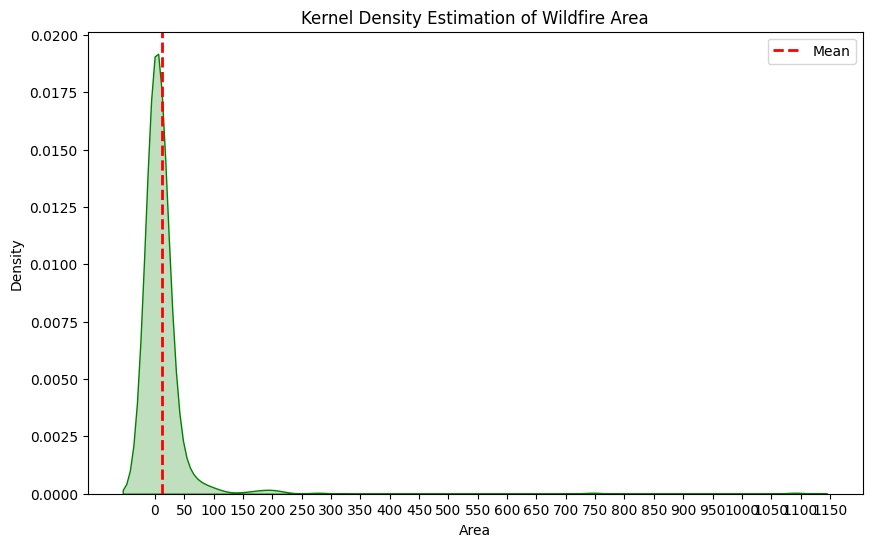

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Print skewness and kurtosis
print("Skew: {}".format(input_data['area'].skew()))
print("Kurtosis: {}".format(input_data['area'].kurtosis()))

# Create KDE plot
ax = sns.kdeplot(input_data['area'], shade=True, color='green', legend=False)

# Set x-axis ticks
plt.xticks([i for i in range(0, 1200, 50)])

# Calculate and plot the mean as a vertical line
mean_area = input_data['area'].mean()
plt.axvline(mean_area, color='red', linestyle='dashed', linewidth=2, label='Mean')

# Set plot labels and title
plt.xlabel('Area')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Wildfire Area')

# Add a legend
plt.legend()

plt.show()
